## 1. Setup and Load Data

### 1.1. Install Dependencies and setup

In [2]:
%pip install tensorflow 
%pip install tensorflow-gpu 
%pip install opencv-python 
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "d:\py\lib\site-packages\packaging\requirements.py", line 36, in __init__
          parsed = _parse_requirement(requirement_string)
        File "d:\py\lib\site-packages\packaging\_parser.py", line 62, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "d:\py\lib\site-packages\packaging\_parser.py", line 80, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "d:\py\lib\site-packages\packaging\_parser.py", line 124, in _parse_requirement_details
          marker = _parse_requirement_marker(
        File "d:\py\lib\site-packages\packaging\_parser.py", line 145, in _parse_requirement_marker
          tokenizer.raise_syntax_error(
        File "d:\py\lib\site-packages\packaging\_tokeni

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip list

Package                                  Version
---------------------------------------- ------------
absl-py                                  2.1.0
aiohappyeyeballs                         2.4.3
aiohttp                                  3.10.10
aiosignal                                1.3.1
alembic                                  1.13.3
anyio                                    4.6.2.post1
apache-airflow                           2.10.2
apache-airflow-providers-common-compat   1.2.1
apache-airflow-providers-common-io       1.4.2
apache-airflow-providers-common-sql      1.18.0
apache-airflow-providers-fab             1.4.1
apache-airflow-providers-ftp             3.11.1
apache-airflow-providers-http            4.13.1
apache-airflow-providers-imap            3.7.0
apache-airflow-providers-smtp            1.8.0
apache-airflow-providers-sqlite          3.9.0
apispec                                  6.7.0
argcomplete                              3.5.1
asgiref                               

In [4]:
import tensorflow as tf
import os

# os is used for merging folder paths with a homogeneous type across all operating systems and can show all items in a directory

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth - help to prevet OOM errors, we take all our gpus 

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

### 1.2. Remove dodgy images

In [6]:
import cv2
import imghdr

In [7]:
#set up path to data directory

data_dir = 'data'

In [8]:
#images extenstion to retain

image_exts = ['jpeg', 'jpg', 'bmp', 'png']

'Aston_Martin_Aramco_F1_Team',
 'BWT_Alpine_F1_Team',
 'McLaren_Formula_1_Team',
 'Mercedes-AMG_Petronas_F1_Team',
 'MoneyGram_Haas_F1_Team',
 'Oracle_Red_Bull_Racing',
 'Scuderia_Ferrari',
 'Stake_F1_Team_Kick_Sauber',
 'Visa_Cash_App_RB_F1_Team',
 'Williams_Racing'

In [9]:
folder_list = os.listdir(data_dir)

In [10]:
# I removed files under 5kB

In [11]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

# we loop thru folders in data folder and thru all images, to open image via OpenCv (img = cv2.imread(image_path))

In [12]:
# from matplotlib import pyplot as plt
# img = cv2.imread(os.path.join('data', 'Aston_Martin_Aramco_F1_Team', '23860.jpg'))
# img.shape
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.show()

### 1.3. Load Data

In [13]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1324 files belonging to 10 classes.


In [18]:
data_iterator = data.as_numpy_iterator()

In [19]:

# data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x0000016700D05900>)

In [39]:
batch = data_iterator.next()

In [28]:
# batch[0].shape # Images represented as numpy arrays

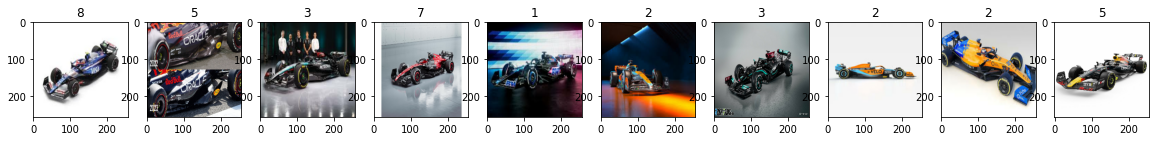

In [40]:
fig, ax = plt.subplots(ncols = 10, figsize = (20,20))

for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 2. Processing Data